In [1]:
import pandas as pd

In [2]:
print('pandas version:', pd.__version__)

pandas version: 1.1.3


In [3]:
train = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
test = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_test.csv", sep=",")
train.shape, test.shape

((17000, 9), (3000, 9))

In [4]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [5]:
print(test.columns)
print(train.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [6]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB
None


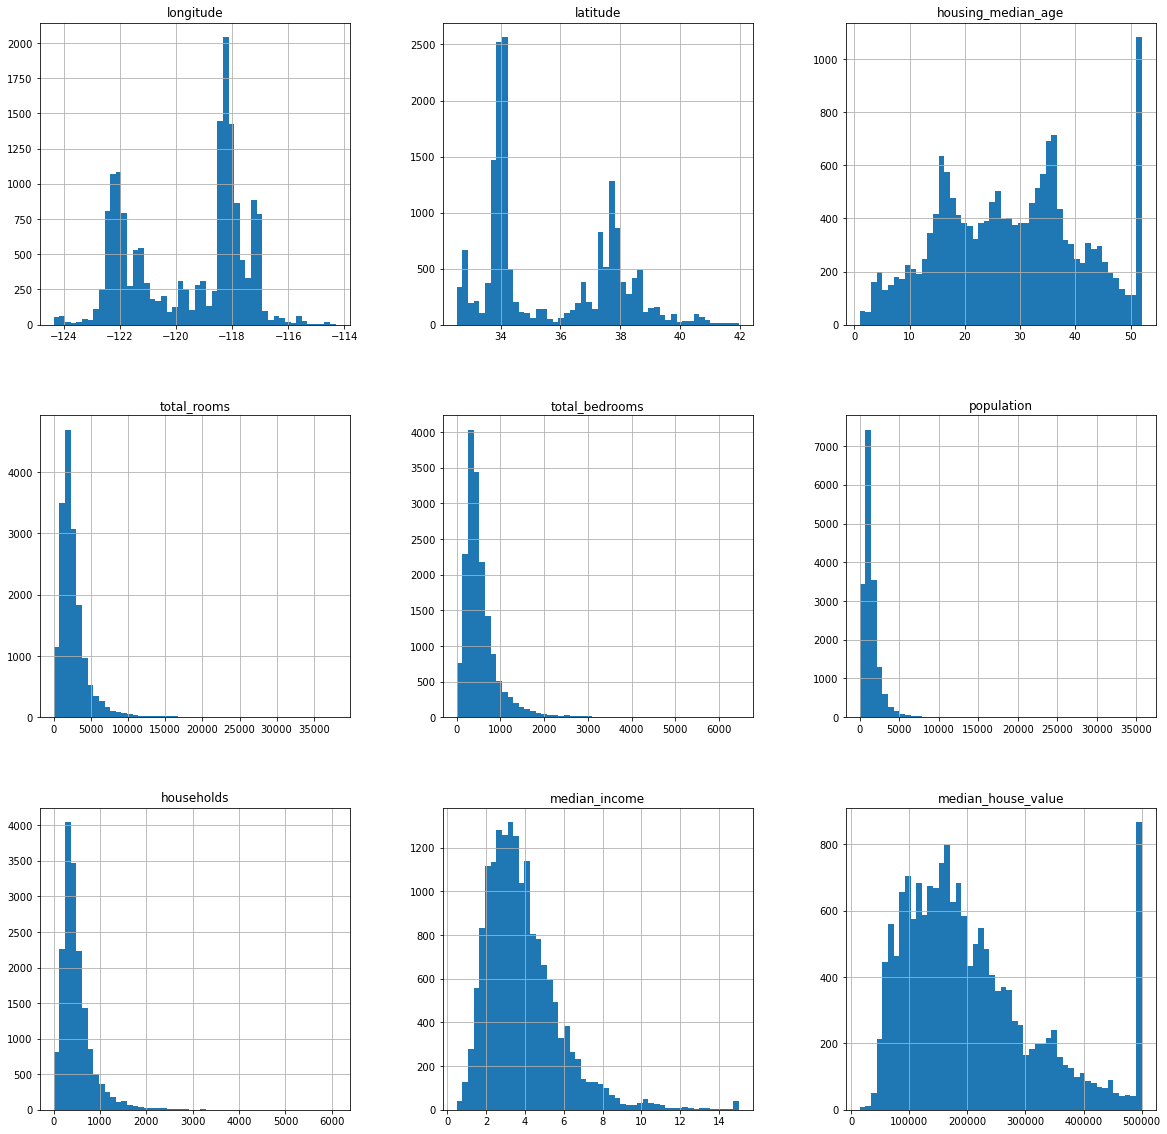

In [7]:
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20, 20))
plt.show()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

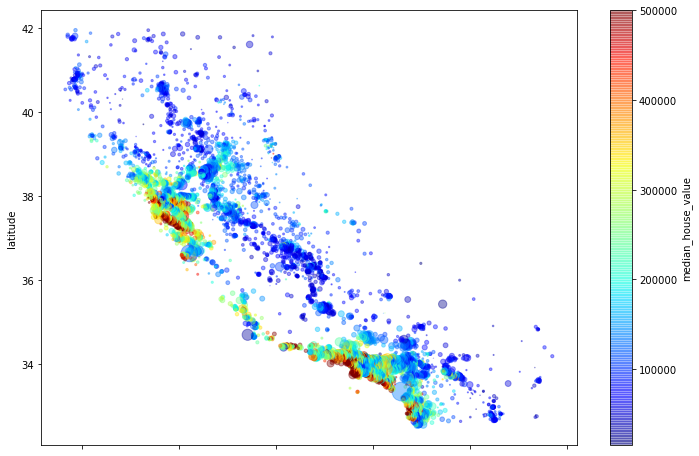

In [10]:
train.plot(
    kind='scatter',
    x='longitude', y='latitude',
    alpha=0.4,
    s=train['population'] / 100,
    c='median_house_value',
    figsize=(12, 8),
    cmap=plt.get_cmap('jet'),
    colorbar=True
)

In [11]:
sel = ['total_rooms', 'total_bedrooms', 'population']

temp_train = train[sel]

print('데이터 가공 셋의 크기:', temp_train.shape)
print('데이터 가공 셋의 일부:')
print(temp_train.head())

데이터 가공 셋의 크기: (17000, 3)
데이터 가공 셋의 일부:
   total_rooms  total_bedrooms  population
0       5612.0          1283.0      1015.0
1       7650.0          1901.0      1129.0
2        720.0           174.0       333.0
3       1501.0           337.0       515.0
4       1454.0           326.0       624.0


<AxesSubplot:xlabel='population'>

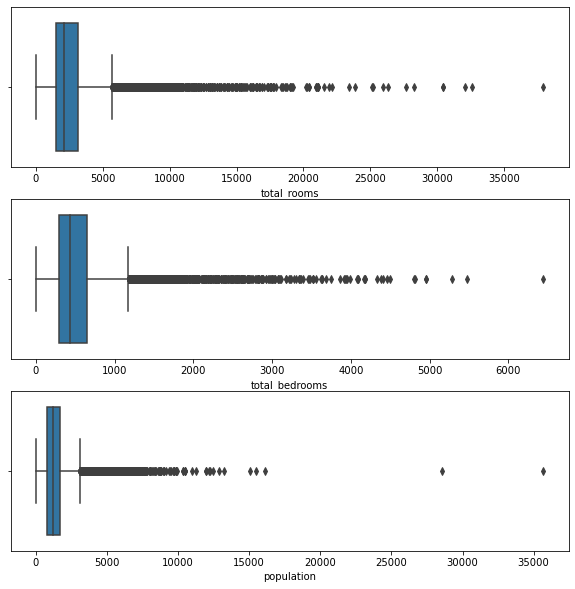

In [13]:
import seaborn as sns 

plt.figure(figsize=(10,10))

plt.subplot(3,1,1) 
sns.boxplot(x="total_rooms", data=temp_train)

plt.subplot(3,1,2) 
sns.boxplot(x="total_bedrooms", data=temp_train)

plt.subplot(3,1,3) 
sns.boxplot(x="population", data=temp_train) 

In [15]:
train.total_rooms.describe()

count    17000.000000
mean      2643.664412
std       2179.947071
min          2.000000
25%       1462.000000
50%       2127.000000
75%       3151.250000
max      37937.000000
Name: total_rooms, dtype: float64

In [19]:
tmp_A1 = train[train['total_rooms'] > 3151]
print(tmp_A1.shape)

tmp_A1.head()

(4250, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
10,-114.60,33.62,16.0,3741.0,801.0,2434.0,824.0,2.6797,86500.0
38,-115.48,32.68,15.0,3414.0,666.0,2097.0,622.0,2.3319,91200.0


In [21]:
tmp_A2 = train[(train['total_rooms'] > 2127) & (train['total_rooms'] <= 3151)]
print(tmp_A2.shape)

tmp_A2.head()

(4247, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
13,-114.61,34.83,31.0,2478.0,464.0,1346.0,479.0,3.2120,70400.0
15,-114.65,34.89,17.0,2556.0,587.0,1005.0,401.0,1.6991,69100.0
42,-115.49,32.67,25.0,2322.0,573.0,2185.0,602.0,1.3750,70100.0
45,-115.50,32.67,35.0,2159.0,492.0,1694.0,475.0,2.1776,75500.0


In [22]:
tmp_A3 = train[(train['total_rooms'] > 1462) & (train['total_rooms'] <= 2127)]
print(tmp_A3.shape)

tmp_A3.head()

(4249, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0
11,-114.60,33.60,21.0,1988.0,483.0,1182.0,437.0,1.6250,62000.0
16,-114.65,33.60,28.0,1678.0,322.0,666.0,256.0,2.9653,94900.0
20,-114.68,33.49,20.0,1491.0,360.0,1135.0,303.0,1.6395,44400.0


In [23]:
tmp_A4 = train[train['total_rooms'] <= 1462]
print(tmp_A4.shape)

tmp_A4.head()

(4254, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
12,-114.61,34.84,48.0,1291.0,248.0,580.0,211.0,2.1571,48600.0


In [24]:
import numpy as np
bool_val = np.where((train['total_rooms'] > 3151), True, False)
train.loc[bool_val, 'room_level'] = 1
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_level
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,1.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,NaN
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,NaN
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,NaN
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,NaN
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,NaN
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,NaN
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,NaN


In [26]:
train.loc[train['total_rooms'] > 3151, 'room_level'] = 1
train.loc[(train['total_rooms'] > 2127) & (train['total_rooms'] <= 3151), 'room_level'] = 2
train.loc[(train['total_rooms'] > 1462) & (train['total_rooms'] <= 2127), 'room_level'] = 3
train.loc[train['total_rooms'] <= 1462, 'room_level'] = 4
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_level
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,1.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,4.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,3.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,4.0
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,2.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,2.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,2.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,2.0


In [27]:
train['room_level'].value_counts()

4.0    4254
1.0    4250
3.0    4249
2.0    4247
Name: room_level, dtype: int64

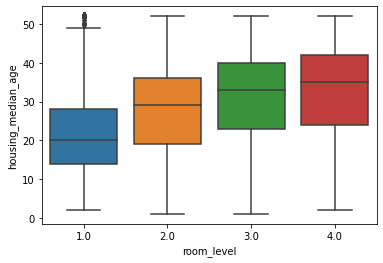

In [30]:
plt.figure()
sns.boxplot(x='room_level', y='housing_median_age', data=train)
plt.show()

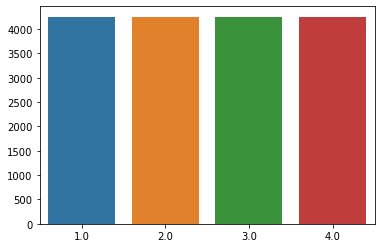

In [41]:
plt.figure()
room_level = train['room_level'].value_counts()
sns.barplot(x=room_level.index, y=room_level.values)
plt.show()